In [283]:
import pandas
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import tkinter
from sko.PSO import PSO
import matplotlib.pyplot as plt

In [284]:
np.random.seed(1)#控制变量

In [285]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
HeartDisease = pandas.read_csv('./processed.cleveland.csv',header=None,names=names)

In [286]:
median=HeartDisease['ca'].median()
HeartDisease['ca'].fillna(median,inplace=True)
median=HeartDisease['thal'].median()
HeartDisease['thal'].fillna(median,inplace=True)
#HeartDisease.info()

In [287]:
label = HeartDisease['num']
data = HeartDisease.drop(['num'],axis=1)

In [288]:
if data.shape[0] == label.shape[0]:
    print('Sample number is equal to label number')
else:
    print('Sample number not equal to label number')
    exit(-1)

Sample number is equal to label number


In [289]:
clf=SVC(kernel='rbf')#测试不同svm在不同核函数下的性能
acc  = cross_val_score(clf, data,label, cv=3)
print(np.mean(acc))

0.6171617161716171


In [290]:
clf = SVC(kernel='poly')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.6600660066006601


In [291]:
clf = SVC(kernel='sigmoid')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.5445544554455446


In [292]:
clf = SVC(kernel='linear')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.8283828382838284


In [293]:
x_train , x_test , y_train , y_test =train_test_split(data, label, test_size=0.25, train_size=0.75, random_state=42)

In [294]:
def plot(position):
    x = []
    y = []
    for i in range(0,len(position)):
        x.append(position[i][0])
        y.append(position[i][1])
    plt.scatter(x, y, alpha = 0.1)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.axis([-1,11,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

In [295]:
class var:
    count=0
    bestsocre=0.0
    bestpos=[]
    tu=[]

In [296]:
def func(x):
    x1,x2=x
    clf = SVC
    socre = cross_val_score(clf(kernel='linear',C=x1, gamma=x2),data, label, cv=3).mean()
    if(socre>var.bestsocre):
        var.bestsocre=socre
        var.bestpos=x
    if var.count%10==0:
        print('iter', int(var.count / 10))
    print(x,socre)
    var.tu.append(x)
    if var.count%10==9:
        print('best position is',var.bestpos,'best score is',var.bestsocre)
        var.bestsocre=0
        plot(var.tu)
        var.tu=[]
    var.count+=1
    return 1-socre

In [297]:
class popvar:
    max_iter=50
    pop=10
    n_dim=2
    w=0.7
    c1=0.5
    c2=0.5
    lb=[0.001, 0.01]
    ub=[10, 10]

iter 0
[1.86341585 3.46215166] 0.8250825082508252
[3.96827797 5.39277917] 0.8250825082508251
[4.19252595 6.85534281] 0.821782178217822
[2.04531805 8.78239319] 0.8250825082508252
[0.27484854 6.70797043] 0.8382838283828383
[4.17363072 5.59131139] 0.821782178217822
[1.404729   1.98903388] 0.8283828382838284
[8.00764494 9.68293314] 0.8184818481848186
[3.13492836 6.92630293] 0.8283828382838284
[8.76401513 8.94712057] 0.8184818481848186
best position is [0.27484854 6.70797043] best score is 0.8382838283828383


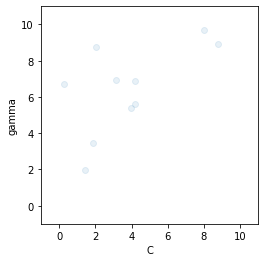

iter 1
[0.001 0.01 ] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.66171053e+00] 0.712871287128713
[9.29339089 8.46714385] 0.8184818481848186
[4.0513402  4.11203827] 0.8250825082508251
[ 6.59890118 10.        ] 0.821782178217822
[1.0000000e-03 6.3945751e+00] 0.712871287128713
[10. 10.] 0.8184818481848186
[ 0.24732524 10.        ] 0.8382838283828383
[1.6727101  7.80786696] 0.821782178217822
best position is [ 0.24732524 10.        ] best score is 0.8382838283828383


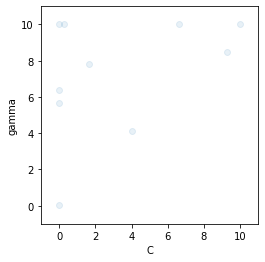

iter 2
[0.001 0.01 ] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.12215906e+00] 0.712871287128713
[10.          8.33947035] 0.8184818481848186
[6.61014635 2.61134643] 0.821782178217822
[ 7.57978549 10.        ] 0.8184818481848186
[1.00000000e-03 9.50108877e+00] 0.712871287128713
[10. 10.] 0.8184818481848186
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 7.82567205e+00] 0.712871287128713
best position is [6.61014635 2.61134643] best score is 0.821782178217822


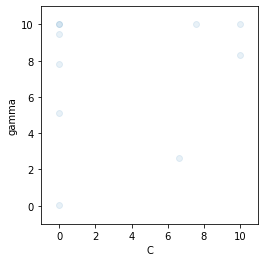

iter 3
[1.00000000e-03 2.42560149e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 4.95904261e+00] 0.712871287128713
[10.          8.76642287] 0.8184818481848186
[4.90861326 5.54362919] 0.821782178217822
[ 6.12250763 10.        ] 0.821782178217822
[1.e-03 1.e+01] 0.712871287128713
[10. 10.] 0.8184818481848186
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.26508614e+00] 0.712871287128713
best position is [4.90861326 5.54362919] best score is 0.821782178217822


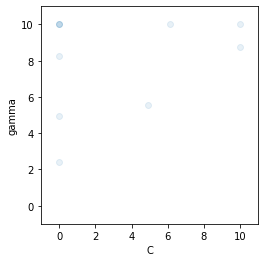

iter 4
[1.0000000e-03 4.6464258e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 7.49871191e+00] 0.712871287128713
[9.36931317 9.62315336] 0.8184818481848186
[2.09802156 9.01420882] 0.8250825082508252
[ 3.41784565 10.        ] 0.8283828382838284
[1.00000000e-03 9.85182021e+00] 0.712871287128713
[ 6.68730813 10.        ] 0.821782178217822
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.71267167e+00] 0.712871287128713
best position is [ 3.41784565 10.        ] best score is 0.8283828382838284


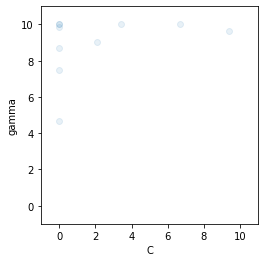

iter 5
[1.00000000e-03 6.50741291e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 9.22346152e+00] 0.712871287128713
[ 7.87097555 10.        ] 0.8184818481848186
[1.e-03 1.e+01] 0.712871287128713
[ 0.08257326 10.        ] 0.8415841584158416
[1.00000000e-03 9.17001117e+00] 0.712871287128713
[ 2.75976707 10.        ] 0.8283828382838284
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.92636168e+00] 0.712871287128713
best position is [ 0.08257326 10.        ] best score is 0.8415841584158416


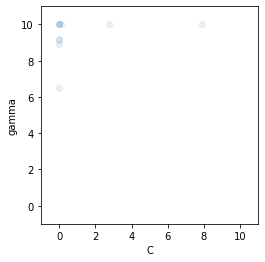

iter 6
[1.00000000e-03 5.75333761e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.0000000e-03 8.7948248e+00] 0.712871287128713
[3.90000987 9.61169926] 0.8250825082508251
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.70097156e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[0.15426313 9.07960534] 0.8382838283828383
best position is [0.15426313 9.07960534] best score is 0.8382838283828383


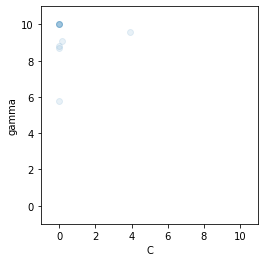

iter 7
[1.00000000e-03 6.07660454e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.40759518e+00] 0.712871287128713
[0.30193508 9.49987057] 0.8382838283828383
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.13426165e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[0.23477336 9.3950714 ] 0.8382838283828383
best position is [0.30193508 9.49987057] best score is 0.8382838283828383


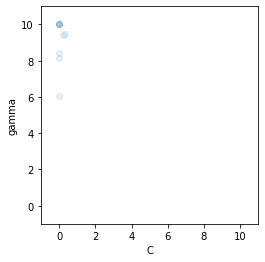

iter 8
[1.00000000e-03 4.04965225e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 7.57373676e+00] 0.712871287128713
[1.00000000e-03 9.54969681e+00] 0.712871287128713
[ 0.49611239 10.        ] 0.8283828382838284
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.07371317e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[0.22369582 9.75694883] 0.8382838283828383
best position is [0.22369582 9.75694883] best score is 0.8382838283828383


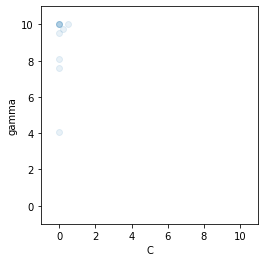

iter 9
[1.00000000e-03 4.89953673e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 6.32311444e+00] 0.712871287128713
[1.00000000e-03 9.66879768e+00] 0.712871287128713
[ 0.76506257 10.        ] 0.821782178217822
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.26762853e+00] 0.712871287128713
[ 0.37374296 10.        ] 0.8415841584158416
[1.85683497e-03 1.00000000e+01] 0.7260726072607261
[0.15642934 9.79342337] 0.8382838283828383
best position is [ 0.37374296 10.        ] best score is 0.8415841584158416


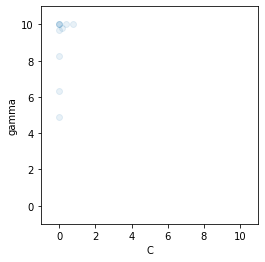

iter 10
[1.00000000e-03 5.27653244e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.63458254e+00] 0.712871287128713
[1.00000000e-03 9.79906228e+00] 0.712871287128713
[ 0.59884238 10.        ] 0.8316831683168316
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 9.06307294e+00] 0.712871287128713
[ 0.58972945 10.        ] 0.8316831683168316
[ 0.13442065 10.        ] 0.8382838283828383
[0.10070638 9.63303283] 0.8316831683168316
best position is [ 0.13442065 10.        ] best score is 0.8382838283828383


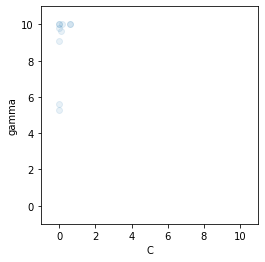

iter 11
[1.00000000e-03 5.91377395e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 6.97793281e+00] 0.712871287128713
[1.00000000e-03 9.86543943e+00] 0.712871287128713
[ 0.40502696 10.        ] 0.834983498349835
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.84492757e+00] 0.712871287128713
[ 0.68464914 10.        ] 0.8283828382838284
[ 0.26751896 10.        ] 0.8382838283828383
[0.07531905 9.50451039] 0.8415841584158416
best position is [0.07531905 9.50451039] best score is 0.8415841584158416


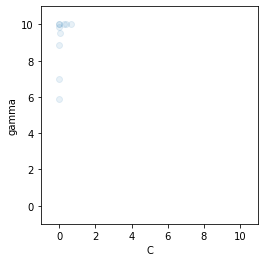

iter 12
[1.00000000e-03 7.09155002e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 8.72135204e+00] 0.712871287128713
[1.00000000e-03 9.78931754e+00] 0.712871287128713
[ 0.24988525 10.        ] 0.8382838283828383
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 7.80673703e+00] 0.712871287128713
[ 0.5961408 10.       ] 0.8316831683168316
[ 0.29678332 10.        ] 0.8382838283828383
[0.05920682 9.52457238] 0.8415841584158416
best position is [0.05920682 9.52457238] best score is 0.8415841584158416


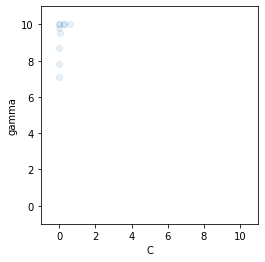

iter 13
[1.00000000e-03 6.24057715e+00] 0.712871287128713
[ 0.03521338 10.        ] 0.8415841584158416
[1.00000000e-03 9.20285308e+00] 0.712871287128713
[1.00000000e-03 9.68000677e+00] 0.712871287128713
[ 0.07413627 10.        ] 0.8415841584158416
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 7.12427822e+00] 0.712871287128713
[ 0.25412123 10.        ] 0.8382838283828383
[ 0.2286266 10.       ] 0.8382838283828383
[0.05390085 9.57375077] 0.8382838283828383
best position is [ 0.03521338 10.        ] best score is 0.8415841584158416


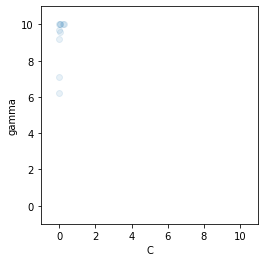

iter 14
[0.01156542 6.12997412] 0.8019801980198021
[ 0.0707167 10.       ] 0.8448844884488449
[0.02568669 7.88669389] 0.8283828382838284
[1.0000000e-03 9.6587079e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[0.02703171 6.68541052] 0.8283828382838284
[ 0.03942107 10.        ] 0.8415841584158416
[ 0.11547055 10.        ] 0.8382838283828383
[0.06424226 9.61743351] 0.8382838283828383
best position is [ 0.0707167 10.       ] best score is 0.8448844884488449


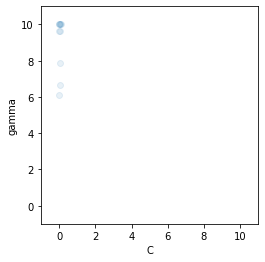

iter 15
[0.03882416 7.27833241] 0.8415841584158416
[ 0.09556902 10.        ] 0.8316831683168316
[0.06518006 7.96740567] 0.8382838283828383
[0.01778141 9.63562471] 0.811881188118812
[1.e-03 1.e+01] 0.712871287128713
[ 0.01886076 10.        ] 0.8151815181518152
[0.05834345 7.78685376] 0.8382838283828383
[1.e-03 1.e+01] 0.712871287128713
[ 0.02515944 10.        ] 0.8250825082508252
[0.07633506 9.60961116] 0.8415841584158416
best position is [0.03882416 7.27833241] best score is 0.8415841584158416


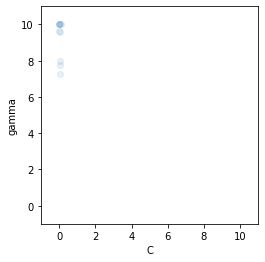

iter 16
[0.07377265 8.16160507] 0.8415841584158416
[ 0.09853964 10.        ] 0.8316831683168316
[0.09440662 8.20731356] 0.8316831683168316
[0.10056817 9.76629075] 0.8316831683168316
[ 0.03628048 10.        ] 0.8415841584158416
[ 0.07440205 10.        ] 0.8415841584158416
[0.08332308 9.14272498] 0.8415841584158416
[4.96026381e-03 1.00000000e+01] 0.7722772277227724
[1.e-03 1.e+01] 0.712871287128713
[0.08317735 9.67197613] 0.8415841584158416
best position is [0.07377265 8.16160507] best score is 0.8415841584158416


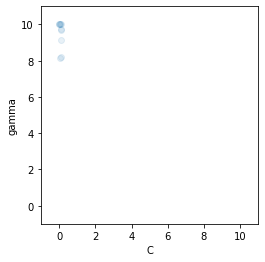

iter 17
[0.09550762 9.24667835] 0.8316831683168316
[ 0.07675783 10.        ] 0.8415841584158416
[0.10281237 8.76529901] 0.8316831683168316
[0.1751447  9.96505253] 0.834983498349835
[ 0.07695198 10.        ] 0.8415841584158416
[ 0.1143251 10.       ] 0.8382838283828383
[ 0.09528071 10.        ] 0.8316831683168316
[ 0.03771789 10.        ] 0.8415841584158416
[ 0.03107988 10.        ] 0.8316831683168316
[0.08159161 9.65586611] 0.8415841584158416
best position is [ 0.07675783 10.        ] best score is 0.8415841584158416


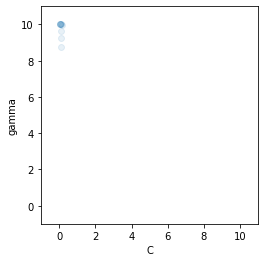

iter 18
[0.09949041 9.47444951] 0.8316831683168316
[ 0.06036794 10.        ] 0.8382838283828383
[0.09434843 9.18208504] 0.8316831683168316
[0.25242791 9.94161692] 0.8382838283828383
[ 0.10334547 10.        ] 0.8316831683168316
[ 0.12257623 10.        ] 0.834983498349835
[ 0.09332103 10.        ] 0.8316831683168316
[ 0.17411546 10.        ] 0.834983498349835
[ 0.13640656 10.        ] 0.834983498349835
[0.07565955 9.64843303] 0.8415841584158416
best position is [0.07565955 9.64843303] best score is 0.8415841584158416


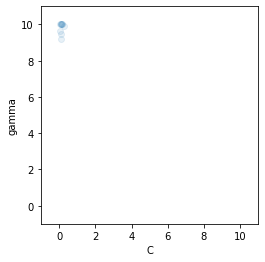

iter 19
[0.06083532 8.93602128] 0.8382838283828383
[ 0.05350611 10.        ] 0.8382838283828383
[0.07244324 9.35118577] 0.8448844884488449
[0.27674986 9.88747361] 0.8382838283828383
[ 0.09910154 10.        ] 0.8316831683168316
[ 0.1043541 10.       ] 0.8316831683168316
[ 0.08643698 10.        ] 0.8382838283828383
[ 0.29181167 10.        ] 0.8382838283828383
[ 0.22218376 10.        ] 0.8382838283828383
[0.06934728 9.74444733] 0.8448844884488449
best position is [0.07244324 9.35118577] best score is 0.8448844884488449


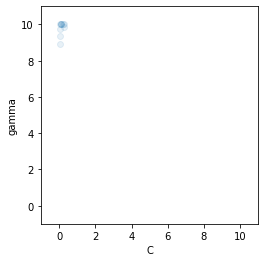

iter 20
[0.02687041 8.29983389] 0.8283828382838284
[ 0.06084017 10.        ] 0.8382838283828383
[0.05684605 9.59012368] 0.8382838283828383
[0.27767612 9.79712185] 0.8382838283828383
[ 0.08467305 10.        ] 0.8415841584158416
[ 0.07487344 10.        ] 0.8415841584158416
[ 0.07405424 10.        ] 0.8415841584158416
[ 0.37777523 10.        ] 0.8415841584158416
[ 0.26101454 10.        ] 0.8382838283828383
[0.06523595 9.90165193] 0.8382838283828383
best position is [ 0.08467305 10.        ] best score is 0.8415841584158416


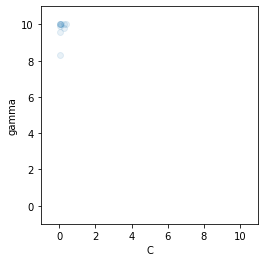

iter 21
[0.01642745 7.96638353] 0.8085808580858087
[ 0.07043303 10.        ] 0.8448844884488449
[0.05444392 9.86423232] 0.8382838283828383
[0.19264314 9.69434321] 0.834983498349835
[ 0.06934196 10.        ] 0.8448844884488449
[ 0.05585679 10.        ] 0.8382838283828383
[0.06518593 9.70581693] 0.8382838283828383
[ 0.33406594 10.        ] 0.8415841584158416
[ 0.26801944 10.        ] 0.8382838283828383
[ 0.06645878 10.        ] 0.8415841584158416
best position is [ 0.07043303 10.        ] best score is 0.8448844884488449


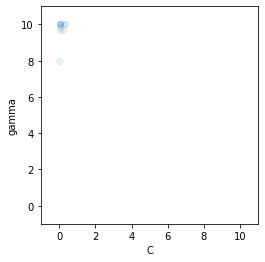

iter 22
[0.03789618 7.98528032] 0.8415841584158416
[ 0.0773238 10.       ] 0.8415841584158416
[0.05816806 9.94757298] 0.8382838283828383
[0.15137166 9.68350203] 0.8382838283828383
[ 0.05921034 10.        ] 0.8415841584158416
[ 0.04954076 10.        ] 0.8415841584158416
[0.06055123 9.32217132] 0.8382838283828383
[ 0.27091843 10.        ] 0.8382838283828383
[ 0.23107046 10.        ] 0.8382838283828383
[ 0.06803376 10.        ] 0.8415841584158416
best position is [0.03789618 7.98528032] best score is 0.8415841584158416


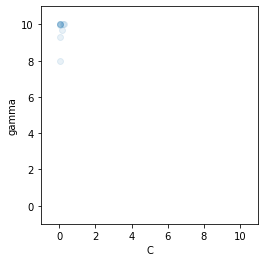

iter 23
[0.06827343 8.25869106] 0.8415841584158416
[ 0.07761615 10.        ] 0.8415841584158416
[0.06862485 9.98080651] 0.8415841584158416
[0.11707919 9.79321203] 0.8382838283828383
[ 0.05422909 10.        ] 0.8382838283828383
[ 0.05915232 10.        ] 0.8415841584158416
[0.06227573 9.12588659] 0.8382838283828383
[ 0.2132479 10.       ] 0.8382838283828383
[ 0.15490726 10.        ] 0.8382838283828383
[0.07061494 9.90608829] 0.8448844884488449
best position is [0.07061494 9.90608829] best score is 0.8448844884488449


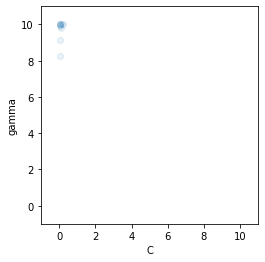

iter 24
[0.07585608 9.18709254] 0.8415841584158416
[ 0.07402056 10.        ] 0.8415841584158416
[0.07638634 9.85311454] 0.8415841584158416
[0.0907607  9.81352239] 0.8382838283828383
[ 0.05709267 10.        ] 0.8382838283828383
[ 0.07683077 10.        ] 0.8415841584158416
[0.06991081 9.34442935] 0.8448844884488449
[ 0.18103215 10.        ] 0.834983498349835
[ 0.12439312 10.        ] 0.834983498349835
[0.07207993 9.80064491] 0.8448844884488449
best position is [0.06991081 9.34442935] best score is 0.8448844884488449


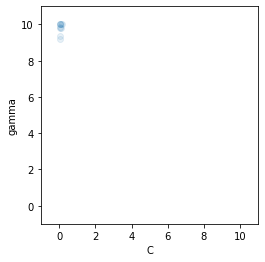

iter 25
[0.07365797 9.88344108] 0.8448844884488449
[ 0.06924602 10.        ] 0.8448844884488449
[0.07896065 9.70474328] 0.8415841584158416
[0.09868945 9.83149508] 0.8316831683168316
[ 0.06577512 10.        ] 0.8382838283828383
[ 0.08887734 10.        ] 0.8382838283828383
[0.0756314  9.55571074] 0.8415841584158416
[ 0.20047012 10.        ] 0.834983498349835
[ 0.10946363 10.        ] 0.8316831683168316
[0.07185288 9.71285633] 0.8448844884488449
best position is [0.07365797 9.88344108] best score is 0.8448844884488449


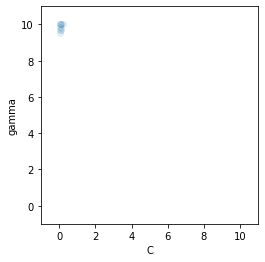

iter 26
[ 0.07083495 10.        ] 0.8448844884488449
[ 0.06653286 10.        ] 0.8415841584158416
[0.0777074  9.56791175] 0.8415841584158416
[0.18097564 9.69194523] 0.834983498349835
[ 0.07275603 10.        ] 0.8448844884488449
[ 0.09488621 10.        ] 0.8316831683168316
[0.07744409 9.69681739] 0.8415841584158416
[ 0.23451643 10.        ] 0.8382838283828383
[ 0.10469932 10.        ] 0.8316831683168316
[0.07049274 9.7151018 ] 0.8448844884488449
best position is [ 0.07083495 10.        ] best score is 0.8448844884488449


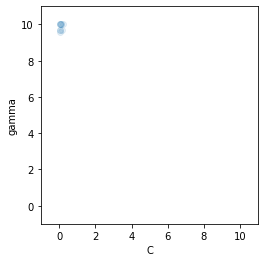

iter 27
[ 0.06907978 10.        ] 0.8448844884488449
[ 0.06539249 10.        ] 0.8382838283828383
[0.07472295 9.38020201] 0.8415841584158416
[0.26992899 9.69178713] 0.8382838283828383
[ 0.07508476 10.        ] 0.8415841584158416
[ 0.083746 10.      ] 0.8415841584158416
[0.07561681 9.8560859 ] 0.8415841584158416
[ 0.241064 10.      ] 0.8382838283828383
[ 0.15864464 10.        ] 0.8382838283828383
[0.0693182  9.81627938] 0.8448844884488449
best position is [ 0.06907978 10.        ] best score is 0.8448844884488449


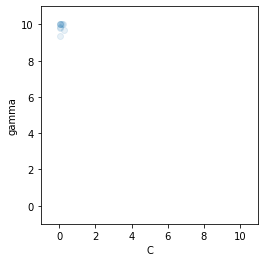

iter 28
[ 0.07061463 10.        ] 0.8448844884488449
[ 0.06535812 10.        ] 0.8382838283828383
[0.06980162 9.26123061] 0.8448844884488449
[0.33459219 9.70957605] 0.8415841584158416
[ 0.0736475 10.       ] 0.8448844884488449
[ 0.07191945 10.        ] 0.8448844884488449
[0.07209934 9.79893173] 0.8448844884488449
[ 0.22692079 10.        ] 0.8382838283828383
[ 0.2149968 10.       ] 0.8382838283828383
[0.06897011 9.89810841] 0.8415841584158416
best position is [ 0.07061463 10.        ] best score is 0.8448844884488449


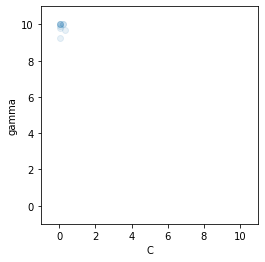

iter 29
[ 0.07246081 10.        ] 0.8448844884488449
[ 0.06914267 10.        ] 0.8448844884488449
[0.06792977 9.2512534 ] 0.8415841584158416
[0.2617607  9.76719112] 0.8382838283828383
[ 0.07165383 10.        ] 0.8448844884488449
[ 0.06349865 10.        ] 0.8382838283828383
[0.06910042 9.69084235] 0.8448844884488449
[ 0.16565594 10.        ] 0.834983498349835
[ 0.19469252 10.        ] 0.834983498349835
[0.06967592 9.91858102] 0.8448844884488449
best position is [ 0.07246081 10.        ] best score is 0.8448844884488449


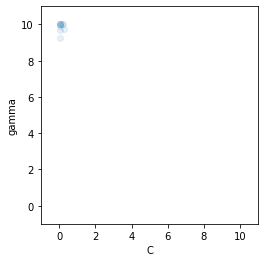

iter 30
[ 0.07384015 10.        ] 0.8415841584158416
[ 0.0729947 10.       ] 0.8448844884488449
[0.06821461 9.31109933] 0.8415841584158416
[0.21145989 9.80136226] 0.8382838283828383
[ 0.06910955 10.        ] 0.8448844884488449
[ 0.05864933 10.        ] 0.8415841584158416
[0.06801566 9.63557155] 0.8415841584158416
[ 0.11605962 10.        ] 0.8382838283828383
[ 0.18410448 10.        ] 0.834983498349835
[0.07021519 9.90080065] 0.8448844884488449
best position is [ 0.0729947 10.       ] best score is 0.8448844884488449


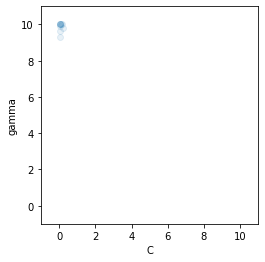

iter 31
[0.0733553  9.99253491] 0.8448844884488449
[ 0.0745091 10.       ] 0.8415841584158416
[0.07049782 9.7074091 ] 0.8448844884488449
[0.19125115 9.83090944] 0.834983498349835
[ 0.06740844 10.        ] 0.8415841584158416
[ 0.05824718 10.        ] 0.8382838283828383
[0.06900381 9.67173342] 0.8415841584158416
[ 0.10781546 10.        ] 0.8316831683168316
[ 0.12977239 10.        ] 0.8382838283828383
[0.07072419 9.87955543] 0.8448844884488449
best position is [0.0733553  9.99253491] best score is 0.8448844884488449


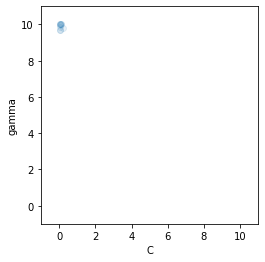

iter 32
[0.07220263 9.9780705 ] 0.8448844884488449
[ 0.07481933 10.        ] 0.8415841584158416
[0.07282364 9.98654863] 0.8448844884488449
[0.17634231 9.91677324] 0.834983498349835
[ 0.0684624 10.       ] 0.8415841584158416
[ 0.06581278 10.        ] 0.8382838283828383
[0.0705446  9.68719431] 0.8448844884488449
[ 0.20826431 10.        ] 0.8382838283828383
[ 0.10997979 10.        ] 0.8316831683168316
[0.07047479 9.85477766] 0.8448844884488449
best position is [0.07220263 9.9780705 ] best score is 0.8448844884488449


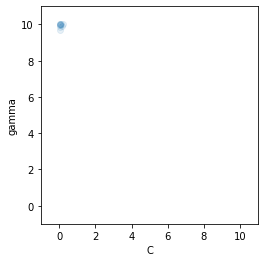

iter 33
[0.07138442 9.93142207] 0.8448844884488449
[ 0.07337274 10.        ] 0.8448844884488449
[ 0.07395575 10.        ] 0.8415841584158416
[0.16931294 9.98096029] 0.834983498349835
[ 0.06981051 10.        ] 0.8448844884488449
[ 0.0740445 10.       ] 0.8415841584158416
[0.07166248 9.73114303] 0.8448844884488449
[ 0.25209352 10.        ] 0.8382838283828383
[ 0.11060211 10.        ] 0.8316831683168316
[0.069902 9.835564] 0.8448844884488449
best position is [0.07138442 9.93142207] best score is 0.8448844884488449


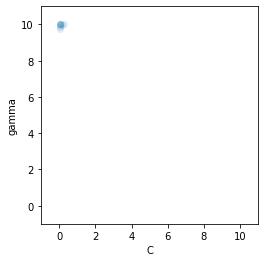

iter 34
[0.0715332  9.92865577] 0.8448844884488449
[ 0.07079617 10.        ] 0.8448844884488449
[0.07370144 9.94563047] 0.8448844884488449
[0.16127684 9.91002657] 0.8382838283828383
[ 0.07082268 10.        ] 0.8448844884488449
[ 0.07841228 10.        ] 0.8415841584158416
[0.07152487 9.73852004] 0.8448844884488449
[ 0.31816711 10.        ] 0.8415841584158416
[ 0.10089215 10.        ] 0.8316831683168316
[0.06961478 9.79334382] 0.8448844884488449
best position is [0.0715332  9.92865577] best score is 0.8448844884488449


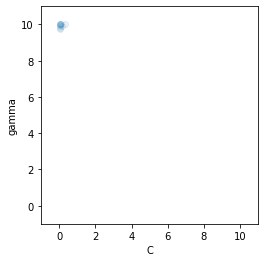

iter 35
[0.07159702 9.95125746] 0.8448844884488449
[ 0.06894984 10.        ] 0.8415841584158416
[0.07284995 9.64092077] 0.8448844884488449
[0.16168124 9.81977259] 0.8382838283828383
[ 0.07078037 10.        ] 0.8448844884488449
[ 0.07797405 10.        ] 0.8415841584158416
[0.07080369 9.71347372] 0.8448844884488449
[ 0.25305557 10.        ] 0.8382838283828383
[ 0.13391279 10.        ] 0.8382838283828383
[0.06967306 9.76592271] 0.8448844884488449
best position is [0.07159702 9.95125746] best score is 0.8448844884488449


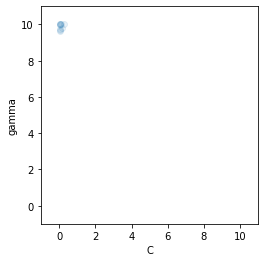

iter 36
[0.07200317 9.96342065] 0.8448844884488449
[ 0.06833247 10.        ] 0.8415841584158416
[0.07125717 9.50688433] 0.8448844884488449
[0.19122387 9.73439754] 0.834983498349835
[ 0.07017577 10.        ] 0.8448844884488449
[ 0.07612143 10.        ] 0.8415841584158416
[0.07024704 9.5396197 ] 0.8448844884488449
[ 0.15493694 10.        ] 0.8382838283828383
[ 0.16809207 10.        ] 0.834983498349835
[0.06988275 9.80322138] 0.8448844884488449
best position is [0.07200317 9.96342065] best score is 0.8448844884488449


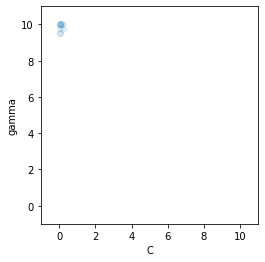

iter 37
[0.07254513 9.95786493] 0.8448844884488449
[ 0.06915572 10.        ] 0.8448844884488449
[0.07023579 9.55472455] 0.8448844884488449
[0.21575085 9.72341104] 0.8382838283828383
[ 0.06944651 10.        ] 0.8448844884488449
[ 0.07242577 10.        ] 0.8448844884488449
[0.06992534 9.3690241 ] 0.8448844884488449
[ 0.07967238 10.        ] 0.8415841584158416
[ 0.2010437 10.       ] 0.834983498349835
[0.07010833 9.89432176] 0.8448844884488449
best position is [0.07254513 9.95786493] best score is 0.8448844884488449


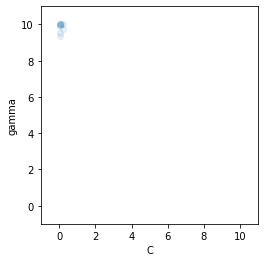

iter 38
[0.07269954 9.93329207] 0.8415841584158416
[ 0.07032533 10.        ] 0.8448844884488449
[0.07007978 9.56283994] 0.8448844884488449
[0.22860104 9.81397091] 0.8382838283828383
[ 0.06907837 10.        ] 0.8448844884488449
[ 0.06883499 10.        ] 0.8415841584158416
[0.06997773 9.43227893] 0.8448844884488449
[ 0.15288993 10.        ] 0.8382838283828383
[ 0.23860521 10.        ] 0.8382838283828383
[0.07012224 9.9695555 ] 0.8448844884488449
best position is [ 0.07032533 10.        ] best score is 0.8448844884488449


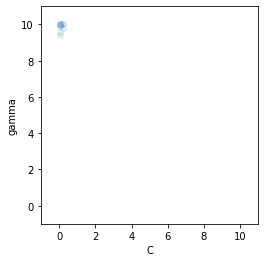

iter 39
[0.07271663 9.92597616] 0.8448844884488449
[ 0.07124667 10.        ] 0.8448844884488449
[0.07025027 9.57198164] 0.8448844884488449
[0.23810394 9.87134428] 0.8382838283828383
[ 0.06943555 10.        ] 0.8448844884488449
[ 0.06714713 10.        ] 0.8415841584158416
[0.07035671 9.61829015] 0.8448844884488449
[ 0.20609427 10.        ] 0.834983498349835
[ 0.21953259 10.        ] 0.8382838283828383
[0.07023487 9.9547943 ] 0.8448844884488449
best position is [0.07271663 9.92597616] best score is 0.8448844884488449


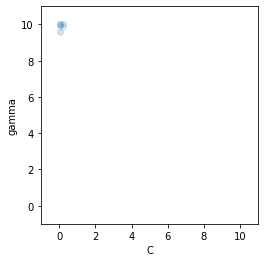

iter 40
[0.07302466 9.92674607] 0.8448844884488449
[ 0.07175848 10.        ] 0.8448844884488449
[0.0713583  9.61754245] 0.8448844884488449
[0.22054527 9.89011319] 0.8382838283828383
[ 0.0698361 10.       ] 0.8448844884488449
[ 0.06825158 10.        ] 0.8415841584158416
[0.07057115 9.74702842] 0.8448844884488449
[ 0.26808421 10.        ] 0.8382838283828383
[ 0.21279926 10.        ] 0.8382838283828383
[0.07009124 9.95252003] 0.8448844884488449
best position is [0.07302466 9.92674607] best score is 0.8448844884488449


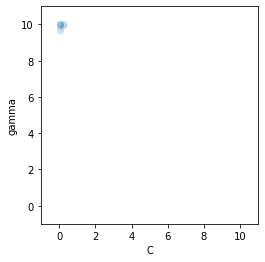

iter 41
[0.07249076 9.94457329] 0.8448844884488449
[ 0.07134493 10.        ] 0.8448844884488449
[0.0720026  9.75246419] 0.8448844884488449
[0.21922537 9.88030763] 0.8382838283828383
[ 0.07047865 10.        ] 0.8448844884488449
[ 0.07115402 10.        ] 0.8448844884488449
[0.07051713 9.92146064] 0.8448844884488449
[ 0.34808132 10.        ] 0.8415841584158416
[ 0.17936431 10.        ] 0.834983498349835
[0.06975522 9.88937181] 0.8448844884488449
best position is [0.07249076 9.94457329] best score is 0.8448844884488449


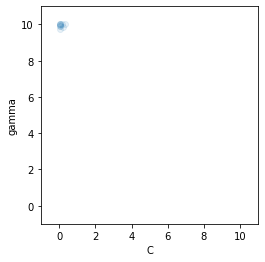

iter 42
[0.07233329 9.97001574] 0.8448844884488449
[ 0.07076839 10.        ] 0.8448844884488449
[0.07209195 9.91416707] 0.8448844884488449
[0.19215491 9.86430005] 0.834983498349835
[ 0.07081191 10.        ] 0.8448844884488449
[ 0.07327103 10.        ] 0.8448844884488449
[ 0.07039582 10.        ] 0.8448844884488449
[ 0.39636047 10.        ] 0.8382838283828383
[ 0.15383848 10.        ] 0.8382838283828383
[0.06947316 9.7953353 ] 0.8448844884488449
best position is [0.07233329 9.97001574] best score is 0.8448844884488449


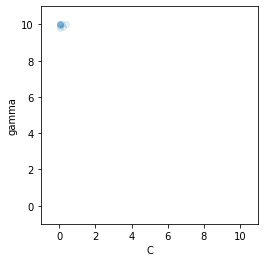

iter 43
[0.07214787 9.97473991] 0.8448844884488449
[ 0.07034386 10.        ] 0.8448844884488449
[0.07175492 9.95783417] 0.8448844884488449
[0.20315196 9.84817317] 0.834983498349835
[ 0.07082342 10.        ] 0.8448844884488449
[ 0.07356929 10.        ] 0.8448844884488449
[ 0.07035735 10.        ] 0.8448844884488449
[ 0.37381754 10.        ] 0.8415841584158416
[ 0.14049364 10.        ] 0.834983498349835
[0.06936225 9.77284962] 0.8448844884488449
best position is [0.07214787 9.97473991] best score is 0.8448844884488449


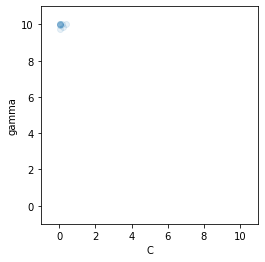

iter 44
[0.07192049 9.963792  ] 0.8448844884488449
[ 0.07026278 10.        ] 0.8448844884488449
[0.07157412 9.81091983] 0.8448844884488449
[0.17469608 9.84137279] 0.834983498349835
[ 0.07026673 10.        ] 0.8448844884488449
[ 0.07229927 10.        ] 0.8448844884488449
[0.07045459 9.74889229] 0.8448844884488449
[ 0.29555486 10.        ] 0.8382838283828383
[ 0.1239985 10.       ] 0.834983498349835
[0.06934988 9.82872607] 0.8448844884488449
best position is [0.07192049 9.963792  ] best score is 0.8448844884488449


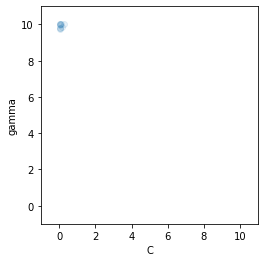

iter 45
[0.07200162 9.95984486] 0.8448844884488449
[ 0.07041192 10.        ] 0.8448844884488449
[0.07133962 9.63370098] 0.8448844884488449
[0.15179215 9.86864154] 0.8382838283828383
[ 0.06965092 10.        ] 0.8448844884488449
[ 0.07120209 10.        ] 0.8448844884488449
[0.07048956 9.4335871 ] 0.8448844884488449
[ 0.20088145 10.        ] 0.834983498349835
[ 0.14573708 10.        ] 0.834983498349835
[0.06981526 9.89184418] 0.8448844884488449
best position is [0.07200162 9.95984486] best score is 0.8448844884488449


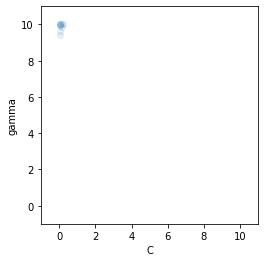

iter 46
[0.07247487 9.95919398] 0.8448844884488449
[ 0.07068001 10.        ] 0.8448844884488449
[0.07120668 9.40870794] 0.8448844884488449
[0.16105315 9.83966445] 0.8382838283828383
[ 0.06965341 10.        ] 0.8448844884488449
[ 0.07047563 10.        ] 0.8448844884488449
[0.07043773 9.26663805] 0.8448844884488449
[ 0.21226002 10.        ] 0.8382838283828383
[ 0.16294133 10.        ] 0.8382838283828383
[0.07014316 9.95513856] 0.8448844884488449
best position is [0.07247487 9.95919398] best score is 0.8448844884488449


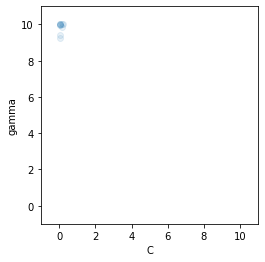

iter 47
[0.0728515  9.95544375] 0.8448844884488449
[ 0.07088467 10.        ] 0.8448844884488449
[0.07132353 9.41170753] 0.8448844884488449
[0.18687362 9.8490392 ] 0.834983498349835
[ 0.06998446 10.        ] 0.8448844884488449
[ 0.07030341 10.        ] 0.8448844884488449
[0.07045725 9.48703373] 0.8448844884488449
[ 0.25425528 10.        ] 0.8382838283828383
[ 0.1533 10.    ] 0.8382838283828383
[0.07034385 9.99763715] 0.8448844884488449
best position is [0.0728515  9.95544375] best score is 0.8448844884488449


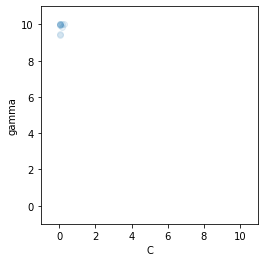

iter 48
[0.07219924 9.94371115] 0.8448844884488449
[ 0.07088237 10.        ] 0.8448844884488449
[0.07153645 9.55045675] 0.8448844884488449
[0.18845    9.81906018] 0.834983498349835
[ 0.07020526 10.        ] 0.8448844884488449
[ 0.07082587 10.        ] 0.8448844884488449
[0.07033476 9.67914293] 0.8448844884488449
[ 0.22170848 10.        ] 0.8382838283828383
[ 0.1575495 10.       ] 0.8382838283828383
[ 0.07023119 10.        ] 0.8448844884488449
best position is [0.07219924 9.94371115] best score is 0.8448844884488449


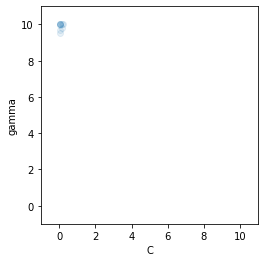

iter 49
[0.0719732  9.95150393] 0.8448844884488449
[ 0.07081681 10.        ] 0.8448844884488449
[0.07167582 9.66696832] 0.8448844884488449
[0.25802655 9.8688266 ] 0.8382838283828383
[ 0.07036488 10.        ] 0.8448844884488449
[ 0.07157831 10.        ] 0.8448844884488449
[0.0701099  9.82763883] 0.8448844884488449
[ 0.16805571 10.        ] 0.834983498349835
[ 0.15595372 10.        ] 0.8382838283828383
[0.06998028 9.97601779] 0.8448844884488449
best position is [0.0719732  9.95150393] best score is 0.8448844884488449


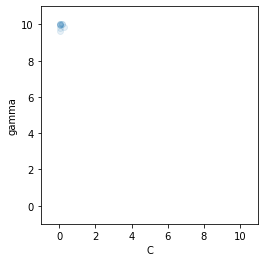

iter 50
[0.07172439 9.95788037] 0.8448844884488449
[ 0.07073773 10.        ] 0.8448844884488449
[0.07177724 9.66305467] 0.8448844884488449
[0.28364398 9.91949268] 0.8382838283828383
[ 0.07057195 10.        ] 0.8448844884488449
[ 0.07213168 10.        ] 0.8448844884488449
[0.06996509 9.98400101] 0.8448844884488449
[ 0.15169619 10.        ] 0.8382838283828383
[ 0.17945283 10.        ] 0.834983498349835
[0.07000277 9.94197883] 0.8448844884488449
best position is [0.07172439 9.95788037] best score is 0.8448844884488449


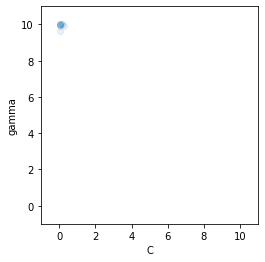

best_C and best_gamma is  [ 0.0707167 10.       ] best_cost is [0.15511551]


In [298]:
pso = PSO(func=func, n_dim=popvar.n_dim, pop=popvar.pop, max_iter=popvar.max_iter, lb=popvar.lb, ub=popvar.ub, w=popvar.w, c1=popvar.c1, c2=popvar.c2)
pso.record_mode = True #记录粒子的历史位置
pso.run()
print('best_C and best_gamma is ', pso.gbest_x, 'best_cost is', pso.gbest_y)

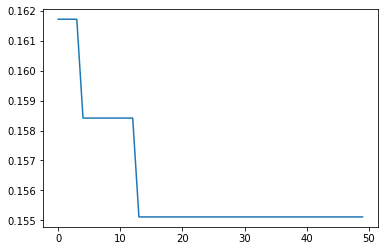

In [299]:
plt.plot(pso.gbest_y_hist)#绘制每一论损失率的折线图
plt.show()

In [300]:
clf=SVC(kernel='linear',C=pso.gbest_x[0],gamma=pso.gbest_x[1])#在pso算法找到的最优位置上测试svm的准确率
psoacc  = cross_val_score(clf, data,label, cv=3).mean()
print(psoacc)

0.8448844884488449


In [301]:
if data.shape[0] == label.shape[0]:
    root = tkinter.Tk()
    text = tkinter.Text(root,width=20,height=1)
    text.insert('1.0',psoacc)
    text.pack()
    root.title('ops-svm预测准确率')
    root.geometry('240x120')
    button = tkinter.Button(root, text="确定", command=root.destroy)
    button.place(x=100,y=80)
    root.mainloop()
else:
    root = tkinter.Tk()
    text = tkinter.Text(root,width=20,height=1)
    text.insert('1.0','发生错误')
    text.pack()
    root.title('预测准确率')
    root.geometry('240x120')
    button = tkinter.Button(root, text="确定", command=root.destroy)
    button.place(x=100,y=80)
    root.mainloop()